# Credit Risk Scoring Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Download the dataset. Uncomment the line to download data 
# !curl -o "data.csv" "https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv"

### 1. Data cleaning and preparation

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [5]:
 df.columns = df.columns.str.lower()

In [6]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   status     4455 non-null   int64
 1   seniority  4455 non-null   int64
 2   home       4455 non-null   int64
 3   time       4455 non-null   int64
 4   age        4455 non-null   int64
 5   marital    4455 non-null   int64
 6   records    4455 non-null   int64
 7   job        4455 non-null   int64
 8   expenses   4455 non-null   int64
 9   income     4455 non-null   int64
 10  assets     4455 non-null   int64
 11  debt       4455 non-null   int64
 12  amount     4455 non-null   int64
 13  price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [8]:
# Checking for null values
df.isna().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [9]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [10]:
# Converting some columns into categories
status_values = {
    1: "ok",
    2: "default",
    0: "unk"
}
df.status = df.status.map(status_values)

home_values = {
    1: "rent",
    2: "owner",
    3: "private",
    4: "ignore",
    5: "parents",
    6: "other",
    0: "unk"
}
df.home = df.home.map(home_values)


marital_values = {
    1: "single",
    2: "married",
    3: "widow",
    4: "separated",
    5: "divorced",
    0: "unk"
}
df.marital = df.marital.map(marital_values)

records_values = {
    1: "no",
    2: "yes",
    0: "unk"
}
df.records = df.records.map(records_values)

job_values = {
    1: "fixed",
    2: "partime",
    3: "freelance",
    4: "others",
    0: "unk"
}
df.job = df.job.map(job_values)

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [12]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [13]:
# Values with entry 99999999 mean those values are empty and have been replaced with such huge figues
for column in ['income', 'assets','debt']:
    df[column] = df[column].replace(to_replace =99999999, value=np.nan)

In [14]:
# Remove record with status as unknown
df = df[df.status != 'unk'].sample(frac = 1).reset_index(drop = True)

In [15]:
# Splitting into train, test, and validation sets
df_train_full, df_test = train_test_split(df, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_train_full, test_size = 0.25, random_state = 42)

In [16]:
df_train  = df_train[df_train.marital != "unk"].reset_index(drop = True)
df_val  = df_val.reset_index(drop = True)
df_test  = df_test.reset_index(drop = True)

In [17]:
for status in df_val.marital:
    if status == "unk":
        print(status)

In [18]:
len(df_train) , len(df_test), len(df_val)

(2671, 891, 891)

In [19]:
y_train = (df_train.status == "default").astype(int).values
y_val = (df_val.status == "default").astype(int).values
y_test = (df_test.status == "default").astype(int).values

In [20]:
del df_train['status']
del df_test['status']
del df_val['status']

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seniority  2671 non-null   int64  
 1   home       2671 non-null   object 
 2   time       2671 non-null   int64  
 3   age        2671 non-null   int64  
 4   marital    2671 non-null   object 
 5   records    2671 non-null   object 
 6   job        2671 non-null   object 
 7   expenses   2671 non-null   int64  
 8   income     2651 non-null   float64
 9   assets     2645 non-null   float64
 10  debt       2660 non-null   float64
 11  amount     2671 non-null   int64  
 12  price      2671 non-null   int64  
dtypes: float64(3), int64(6), object(4)
memory usage: 271.4+ KB


### 6.2 Decision Trees

In [22]:
def assess_risk(client):
    if client["records"] == "yes":
        if client["job"] == "parttime":
            return "ok"
        return "default"
    else:
        if client["assets"] > 6000:
            return "ok"
        return "default"

In [23]:
client  = df_train.iloc[0].to_dict()

In [24]:
assess_risk(client)

'ok'

In [25]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [26]:
# Convert the dataframe into a dictionary
train_dicts = df_train.fillna(0).to_dict(orient="records")
# Initialize dictionary vectorizer
dv = DictVectorizer(sparse = False)
# Fit and transform the train_dicts
X_train = dv.fit_transform(train_dicts)

In [27]:
# Viewing the transformed train data.
X_train

array([[2.40e+01, 1.07e+03, 8.00e+03, ..., 0.00e+00, 0.00e+00, 6.00e+01],
       [2.60e+01, 1.80e+03, 0.00e+00, ..., 1.00e+00, 6.00e+00, 6.00e+01],
       [3.60e+01, 1.20e+03, 4.75e+03, ..., 0.00e+00, 1.30e+01, 4.80e+01],
       ...,
       [2.10e+01, 6.00e+02, 4.00e+03, ..., 0.00e+00, 4.00e+00, 4.80e+01],
       [4.20e+01, 1.00e+03, 2.50e+04, ..., 0.00e+00, 3.00e+00, 6.00e+01],
       [5.00e+01, 1.80e+03, 8.00e+04, ..., 0.00e+00, 1.00e+01, 4.80e+01]])

In [28]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unk', 'income', 'job=fixed', 'job=freelance',
       'job=others', 'job=partime', 'job=unk', 'marital=divorced',
       'marital=married', 'marital=separated', 'marital=single',
       'marital=widow', 'price', 'records=no', 'records=yes', 'seniority',
       'time'], dtype=object)

In [29]:
tree = DecisionTreeClassifier()

In [30]:
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
# Converting validation data into dictionaries
val_dicts = df_val.fillna(0).to_dict(orient = "records")
X_val = dv.transform(val_dicts)

In [32]:
y_pred = tree.predict_proba(X_val)[:,1]

In [33]:
y_pred.shape

(891,)

In [34]:
roc_auc_score(y_val, y_pred)

0.660599334073252

In [35]:
y_pred_train = tree.predict_proba(X_train)[:,1]
roc_auc_score(y_train, y_pred_train)

1.0

In [36]:
# Viewing the decision tree
r = export_text(tree, feature_names=list(dv.get_feature_names_out()))
print(r)

|--- records=yes <= 0.50
|   |--- seniority <= 2.50
|   |   |--- income <= 86.50
|   |   |   |--- home=rent <= 0.50
|   |   |   |   |--- time <= 27.00
|   |   |   |   |   |--- amount <= 195.00
|   |   |   |   |   |   |--- amount <= 113.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- amount >  113.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- amount >  195.00
|   |   |   |   |   |   |--- marital=separated <= 0.50
|   |   |   |   |   |   |   |--- age <= 20.50
|   |   |   |   |   |   |   |   |--- amount <= 500.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- amount >  500.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- age >  20.50
|   |   |   |   |   |   |   |   |--- seniority <= 1.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- seniority >  1.50
|   |   |   |   |   |   |   |   |   |--- age <= 34.00
|   |   |   |   |   

### Decision tree parameter tuning
* selecting `max-depth`
* selecting `min-sample-leafs`

In [37]:
# Parameter tuning for the maximum depth and min sample leafs.
scores = []
for depth in np.arange(2,30,2):
    for leaf in np.arange(2,31,2):
        tree_2 = DecisionTreeClassifier(max_depth = depth, min_samples_leaf = leaf)
        tree_2.fit(X_train,y_train)

        y_pred = tree_2.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((depth, leaf, auc))
    


In [38]:
# Conver the the scores into a dataframe.
df_scores = pd.DataFrame(scores, columns = ["max_depth", "min_samples_leaf", "auc"])
df_scores

,max_depth,min_samples_leaf,auc
0,2,2,0.703771
1,2,4,0.703771
2,2,6,0.703771
3,2,8,0.703771
4,2,10,0.703771
...,...,...,...
205,28,22,0.807085
206,28,24,0.808959
207,28,26,0.812067
208,28,28,0.803382


In [39]:
df_scores_sorted = df_scores.sort_values("auc", ascending = False).reset_index(drop = True)

In [40]:
df_scores_sorted.head()

,max_depth,min_samples_leaf,auc
0,10,30,0.813735
1,14,30,0.812816
2,24,30,0.812816
3,16,30,0.812292
4,26,26,0.812067


In [41]:
df_scores_pivot = df_scores_sorted.pivot(index = "min_samples_leaf", columns = ["max_depth"], values = ["auc"])

In [42]:
df_scores_pivot.round(3)

auc                                                   \
max_depth            2      4      6      8      10     12     14     16   
min_samples_leaf                                                           
2                 0.704  0.775  0.775  0.751  0.671  0.671  0.680  0.674   
4                 0.704  0.775  0.784  0.764  0.719  0.729  0.734  0.733   
6                 0.704  0.775  0.787  0.762  0.752  0.747  0.744  0.749   
8                 0.704  0.775  0.782  0.774  0.750  0.761  0.758  0.761   
10                0.704  0.775  0.791  0.779  0.768  0.770  0.774  0.778   
12                0.704  0.775  0.792  0.789  0.771  0.783  0.782  0.783   
14                0.704  0.775  0.790  0.788  0.775  0.788  0.790  0.790   
16                0.704  0.775  0.790  0.786  0.782  0.790  0.786  0.790   
18                0.704  0.775  0.791  0.787  0.783  0.791  0.789  0.787   
20                0.704  0.775  0.793  0.794  0.792  0.793  0.799  0.793   
22                0.704  0.778  0.795  0.808  0.807  0.807  0.806  0.807   
24                0.704  0.778  0.796  0.807  0.811  0.810  0.809  0.809   
26                0.704  0.778  0.797  0.806  0.810  0.812  0.812  0.812   
28                0.704  0.766  0.801  0.806  0.807  0.804  0.803  0.804   
30                0.704  0.766  0.804  0.811  0.814  0.812  0.813  0.812   

                                                            
max_depth            18     20     22     24     26     28  
min_samples_leaf                                            
2                 0.676  0.673  0.677  0.665  0.668  0.672  
4                 0.733  0.727  0.740  0.725  0.737  0.735  
6                 0.750  0.753  0.744  0.741  0.746  0.747  
8                 0.760  0.769  0.762  0.761  0.764  0.760  
10                0.772  0.773  0.775  0.776  0.775  0.776  
12                0.782  0.784  0.784  0.784  0.785  0.785  
14                0.790  0.790  0.790  0.790  0.790  0.791  
16                0.784  0.785  0.784  0.783  0.790  0.785  
18                0.787  0.791  0.791  0.787  0.788  0.793  
20                0.799  0.793  0.799  0.793  0.793  0.793  
22                0.806  0.806  0.807  0.807  0.806  0.807  
24                0.810  0.810  0.809  0.810  0.809  0.809  
26                0.812  0.812  0.812  0.811  0.812  0.812  
28                0.803  0.803  0.803  0.803  0.804  0.803  
30                0.812  0.812  0.811  0.813  0.812  0.811

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

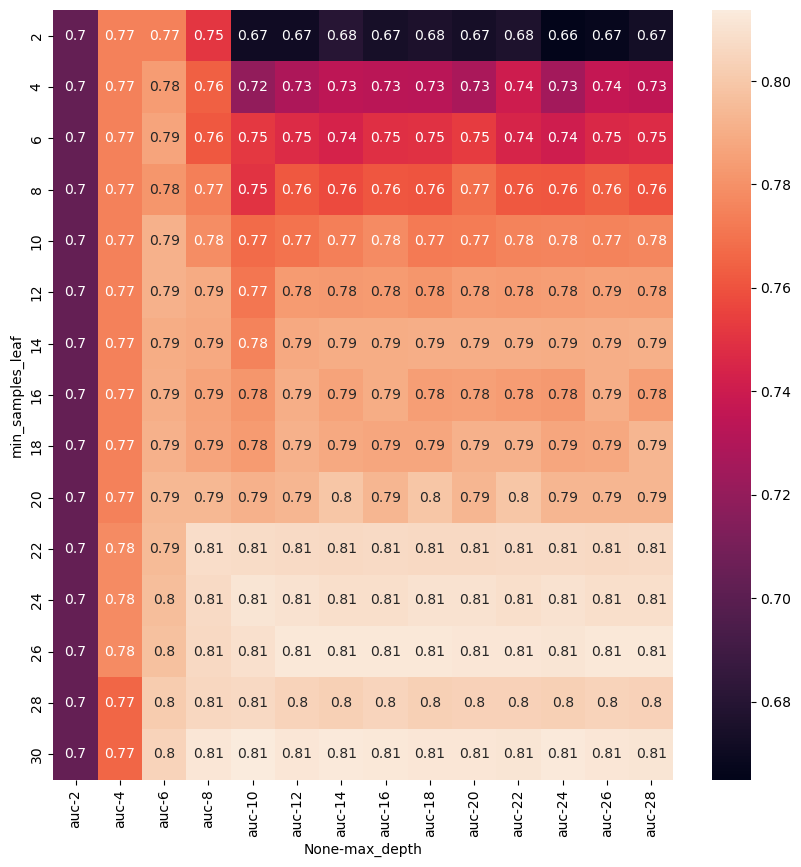

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(df_scores_pivot, annot = True)

In [44]:
# Selecting a good decision tree after parameter tuning.
best_tree = DecisionTreeClassifier(max_depth = 14, min_samples_leaf = 24)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=14, min_samples_leaf=24)

### Ensemble Learning and Random Forest

* Random Forest Example

In [45]:
from sklearn.ensemble import RandomForestClassifier


In [46]:
rf = RandomForestClassifier(n_estimators = 100, random_state = 24)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=24)

In [47]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.8512146997163645

In [48]:
auc_scores = []
for estimator_number in range(10,201,10):
    forest = RandomForestClassifier(n_estimators = estimator_number,
                                    random_state = 42)
    forest.fit(X_train, y_train)
    
    y_prediction = forest.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_prediction)
    auc_scores.append((estimator_number, auc))

In [49]:
print(auc_scores)

[(10, 0.8089406831915156), (20, 0.8278980145517326), (30, 0.8384665186829449), (40, 0.8438247626094464), (50, 0.8435226291774572), (60, 0.8445646812183993), (70, 0.8434486373165619), (80, 0.8437230238007153), (90, 0.8428721174004193), (100, 0.8445461832531755), (110, 0.8460722653841412), (120, 0.8475151066715995), (130, 0.846725860155383), (140, 0.8475767665556789), (150, 0.8480546306572944), (160, 0.8482858552225923), (170, 0.8491059316808484), (180, 0.8502219755826858), (190, 0.8498057713651497), (200, 0.8494851399679368)]


In [50]:
forest_df = pd.DataFrame(auc_scores, columns = ["n_estimators", "auc_scores"])

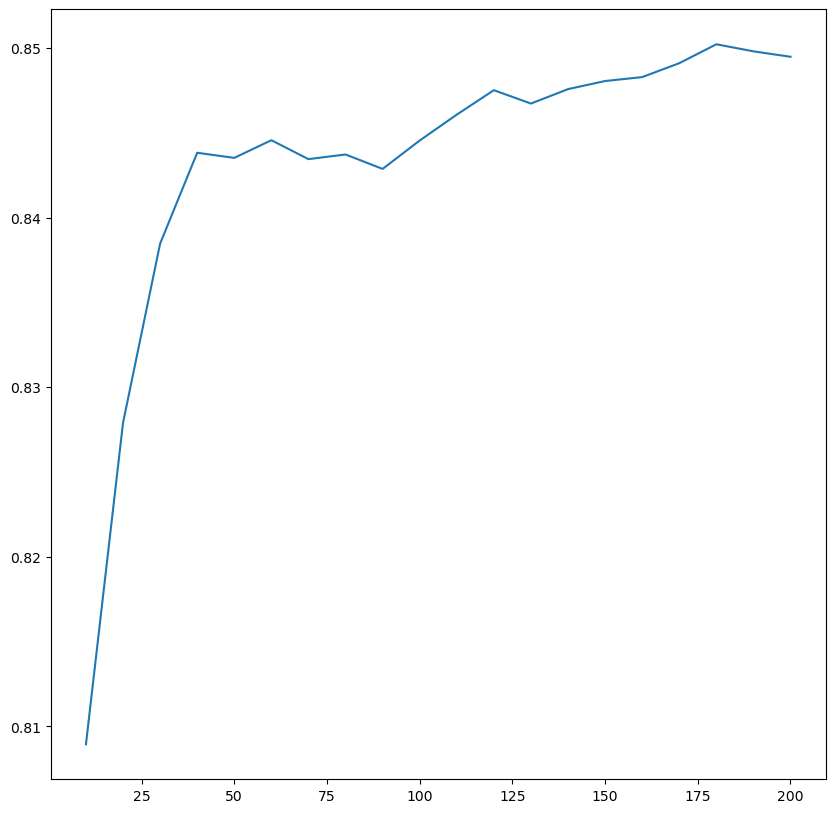

In [51]:
plt.figure(figsize = (10,10))
plt.plot(forest_df.n_estimators, forest_df.auc_scores);

In [52]:
# Tuning the mazx_depth of the RandomForestClassifier
auc_scores = []
for depth in [5,10,15,20]:
    for estimator_number in range(10,201,10):
        forest = RandomForestClassifier(n_estimators = estimator_number,
                                        max_depth = depth,
                                        random_state = 42)
        forest.fit(X_train, y_train)

        y_prediction = forest.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_prediction)
        auc_scores.append((depth, estimator_number, auc))



In [53]:
df_scores = pd.DataFrame(auc_scores, columns = ["max_depth", "estimator_number", "auc"])
df_scores

,max_depth,estimator_number,auc
0,5,10,0.831545
1,5,20,0.835966
2,5,30,0.839823
3,5,40,0.840252
4,5,50,0.840282
...,...,...,...
75,20,160,0.844691
76,20,170,0.845622
77,20,180,0.846766
78,20,190,0.847136


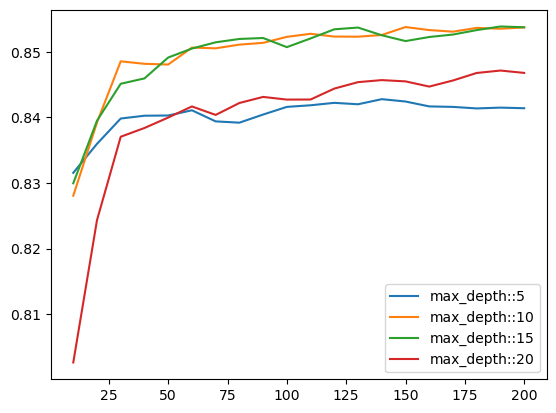

In [54]:
for depth in [5,10,15,20]:
    df_subset = df_scores[df_scores.max_depth == depth]
    plt.plot(df_subset.estimator_number, df_subset.auc, label = f"max_depth::{depth}")
plt.legend()
plt.show()

In [55]:
# Write the code to train with different min_sample_leaf hyperparameters (select the best max_depth to be constant).
scores = []
for min_sample_leaf in [1,3,5,10,50]:
    for n_estimator in range(10,100, 10):
        random_forest = RandomForestClassifier(n_estimators = n_estimator,
                                              max_depth = 10,
                                              min_samples_leaf = min_sample_leaf,
                                              random_state = 42)
        random_forest.fit(X_train, y_train)
        y_pred = random_forest.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((n_estimator,min_sample_leaf,auc))
    

In [56]:
df_ = pd.DataFrame(scores, columns = ["number_estimators", "min_sample_leaf", "auc_score"])
df_[:10]

,number_estimators,min_sample_leaf,auc_score
0,10,1,0.828061
1,20,1,0.839222
2,30,1,0.848539
3,40,1,0.848163
4,50,1,0.848052
5,60,1,0.850629
6,70,1,0.850524
7,80,1,0.851085
8,90,1,0.851357
9,10,3,0.832849


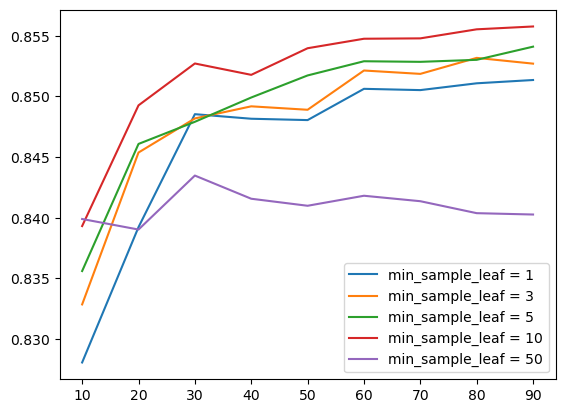

In [57]:
for leaf in [1,3,5,10,50]:
    df_subset = df_[df_.min_sample_leaf == leaf]
    plt.plot(df_subset.number_estimators, df_subset.auc_score, label = f"min_sample_leaf = {leaf}")
    
plt.legend();

### 6.7 Gradient Boosting and XGBoost

* Gradient Boosting v RandomForest

In [58]:
import xgboost as xgb

In [59]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)

In [60]:
# Training a model
xgb_params = {'eta': 0.3,
              'max_depth': 6,
              'min_child_weight': 1,
              'objective':'binary:logistic',
              'nthread': 4,
              'seed': 42,
              'verbosity': 1
             }
model = xgb.train(params = xgb_params,dtrain = dtrain,num_boost_round = 9)

In [61]:
# Using the model to predict validation set and calculating the roc_auc_score
y_pred = model.predict(dval)
xgb_auc = roc_auc_score(y_val, y_pred)
xgb_auc

0.8404889628807498

In [62]:
%%capture output 
# Monitoring the performance of a xgb by evaluating on after each tree is trained 
watchlist = [(dtrain, 'train'), (dval, 'val')]

# Training a model
xgb_params = {'eta': 0.3,
              'max_depth': 6,
              'min_child_weight': 1,
              'objective':'binary:logistic',
              'eval_metric':'auc',
              'nthread': 4,
              'seed': 42,
              'verbosity': 1
             }
model_1 = xgb.train(params = xgb_params,
                    dtrain = dtrain,
                    evals = watchlist,
                    verbose_eval = 5,
                    num_boost_round = 200)

In [63]:
# Custom function to create a data frame from the printed output
def parse_xgb_output(output):
    scores = []

    for line in output.stdout.strip().split('\n'):
        line_split = line.split('\t')
        itr, train_score, val_score = line_split
        
        itr = int(itr.strip('[]'))
        train_score = float(train_score.split(":")[1])
        val_score = float(val_score.split(":")[1])
        scores.append((itr,train_score,val_score))
        
    columns = ["iteration", "train_auc_score", "val_auc_score"]
    return pd.DataFrame(scores, columns = columns)

In [64]:
xgb_df = parse_xgb_output(output).sort_values('train_auc_score').reset_index(drop = True)
xgb_df

,iteration,train_auc_score,val_auc_score
0,0,0.85918,0.78358
1,5,0.92409,0.83479
2,10,0.94867,0.84316
3,15,0.96280,0.84027
4,20,0.97263,0.83934
5,25,0.97838,0.83980
6,30,0.98313,0.83959
7,35,0.98733,0.84073
8,40,0.99080,0.84003
9,45,0.99401,0.84028


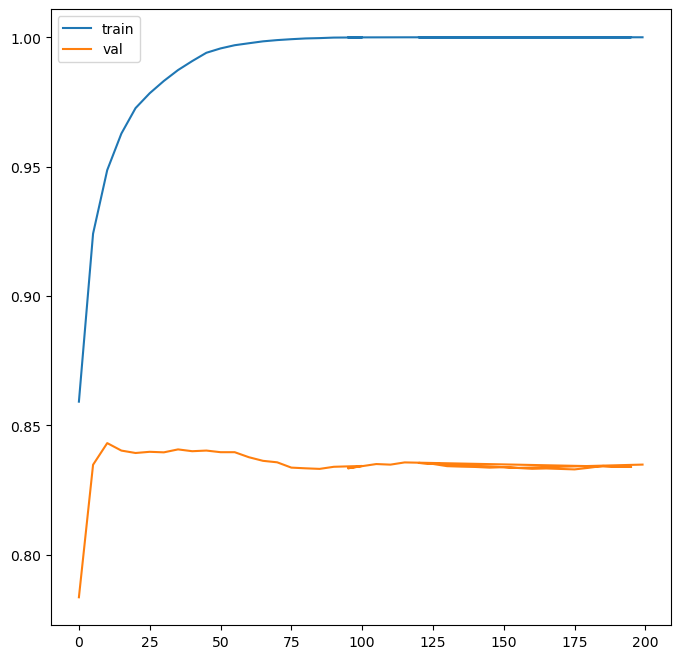

In [65]:
plt.figure(figsize = (8,8))
plt.plot(xgb_df.iteration, xgb_df.train_auc_score, label = "train")
plt.plot(xgb_df.iteration, xgb_df.val_auc_score, label ="val")

plt.legend();

### XGBoost Parameter Tuning

In [66]:
# Final  model after tuning
xgb_param = {'eta': 0.01,
              'max_depth': 3,
              'min_child_weight': 6,

              'objective':'binary:logistic',
              'eval_metric':'auc',

              'nthread': 8,
              'seed': 1,
              'verbosity': 1
             }
model_1 = xgb.train(params = xgb_param,
                    dtrain = dtrain,
                    evals = watchlist,
                    verbose_eval = 5,
                    num_boost_round = 40)

[0]	train-auc:0.76869	val-auc:0.76139
[5]	train-auc:0.76963	val-auc:0.76130
[10]	train-auc:0.78462	val-auc:0.77224
[15]	train-auc:0.79313	val-auc:0.78358
[20]	train-auc:0.79390	val-auc:0.78399
[25]	train-auc:0.79591	val-auc:0.78495
[30]	train-auc:0.79689	val-auc:0.78491
[35]	train-auc:0.79943	val-auc:0.78554
[39]	train-auc:0.80159	val-auc:0.78640


* Experiment with other parameters

### Selecting the final model

In [67]:
df_full_train = df_train_full.reset_index(drop = True)

In [68]:
y_train_full = (df_train_full.status == 'default').astype(int).values
y_train_full

array([1, 1, 0, ..., 1, 0, 0])

In [69]:
del df_full_train["status"]

In [70]:
dicts_full_train = df_full_train.to_dict(orient = 'records')
dv = DictVectorizer(sparse = False)
X_train_full = dv.fit_transform(dicts_full_train)
dicts_test = df_test.to_dict(orient = 'records')
X_test = dv.transform(dicts_test)

In [90]:
dicts_full_train[0]

{'seniority': 7,
 'home': 'owner',
 'time': 36,
 'age': 38,
 'marital': 'married',
 'records': 'yes',
 'job': 'fixed',
 'expenses': 45,
 'income': 85.0,
 'assets': 3400.0,
 'debt': 1500.0,
 'amount': 450,
 'price': 550}

In [79]:
features = dv.get_feature_names_out() 
dfull_train = xgb.DMatrix(X_train_full, label = y_train_full, feature_names= dv.feature_names_)
dtest = xgb.DMatrix(X_test, feature_names = features)

In [72]:
# Training on full train data
xgb_param = {'eta': 0.3,
              'max_depth': 3,
              'min_child_weight': 1,

              'objective':'binary:logistic',
              'eval_metric':'auc',

              'nthread': 4,
              'seed': 1,
              'verbosity': 1
             }
final_model = xgb.train(xgb_param,
                    dfull_train,
                    num_boost_round = 175)

In [73]:
y_pred = final_model.predict(dtest) 

In [74]:
roc_auc_score(y_test,y_pred)

0.8317019861256295

### Saving the model using bentoml

In [76]:
import bentoml
bentoml.xgboost.save_model("credit_risk_pred_model",final_model,
                          custom_objects = {
                              "DictVectorizer":dv
                          })

Model(tag="credit_risk_pred_model:z6g5kezjlkkzlzfz", path="C:\Users\Isaac\bentoml\models\credit_risk_pred_model\z6g5kezjlkkzlzfz\")